# Personal Project - Flight Delay - Working Notebook

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from datetime import timedelta, datetime
import csv

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, kruskal


from env import user, password, host
import flight_delay_acquire
import flight_delay_prepare

In [7]:
# Expanding the columns I can visualize
pd.set_option('display.max_columns', 500)

# Data Dictionary

|    |   Variable descriptions | Unnamed: 1        | Unnamed: 2                                                                |
|---:|------------------------:|:------------------|:--------------------------------------------------------------------------|
|  0 |                     nan | nan               | nan                                                                       |
|  1 |                     nan | Name              | Description                                                               |
|  2 |                       1 | Year              | 1987-2008                                                                 |
|  3 |                       2 | Month             | 12-Jan                                                                    |
|  4 |                       3 | DayofMonth        | 31-Jan                                                                    |
|  5 |                       4 | DayOfWeek         | 1 (Monday) - 7 (Sunday)                                                   |
|  6 |                       5 | DepTime           | actual departure time (local, hhmm)                                       |
|  7 |                       6 | CRSDepTime        | scheduled departure time (local, hhmm)                                    |
|  8 |                       7 | ArrTime           | actual arrival time (local, hhmm)                                         |
|  9 |                       8 | CRSArrTime        | scheduled arrival time (local, hhmm)                                      |
| 10 |                       9 | UniqueCarrier     | unique carrier code                                                       |
| 11 |                      10 | FlightNum         | flight number                                                             |
| 12 |                      11 | TailNum           | plane tail number                                                         |
| 13 |                      12 | ActualElapsedTime | in minutes                                                                |
| 14 |                      13 | CRSElapsedTime    | in minutes                                                                |
| 15 |                      14 | AirTime           | in minutes                                                                |
| 16 |                      15 | ArrDelay          | arrival delay, in minutes                                                 |
| 17 |                      16 | DepDelay          | departure delay, in minutes                                               |
| 18 |                      17 | Origin            | origin IATA airport code                                                  |
| 19 |                      18 | Dest              | destination IATA airport code                                             |
| 20 |                      19 | Distance          | in miles                                                                  |
| 21 |                      20 | TaxiIn            | taxi in time, in minutes                                                  |
| 22 |                      21 | TaxiOut           | taxi out time in minutes                                                  |
| 23 |                      22 | Cancelled         | was the flight cancelled?                                                 |
| 24 |                      23 | CancellationCode  | reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |
| 25 |                      24 | Diverted          | 1 = yes, 0 = no                                                           |
| 26 |                      25 | CarrierDelay      | in minutes                                                                |
| 27 |                      26 | WeatherDelay      | in minutes                                                                |
| 28 |                      27 | NASDelay          | in minutes                                                                |
| 29 |                      28 | SecurityDelay     | in minutes                                                                |
| 30 |                      29 | LateAircraftDelay | in minutes                                                                |

# Acquire

In [2]:
# Calling wrangle function from acquire.py
df = flight_delay_acquire.wrangle_flight_delay()

In [8]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,uniq_carr_9E,uniq_carr_AA,uniq_carr_AQ,uniq_carr_AS,uniq_carr_B6,uniq_carr_CO,uniq_carr_DL,uniq_carr_EV,uniq_carr_F9,uniq_carr_FL,uniq_carr_HA,uniq_carr_MQ,uniq_carr_NW,uniq_carr_OH,uniq_carr_OO,uniq_carr_UA,uniq_carr_US,uniq_carr_WN,uniq_carr_XE,uniq_carr_YV
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,N351,69,75,54,1,7,SMF,ONT,389,4,11,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2007,1,1,1,1918,1905,2043,2035,WN,462,N370,85,90,74,8,13,SMF,PDX,479,5,6,0,0,0,0,0,0,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2007,1,1,1,2206,2130,2334,2300,WN,1229,N685,88,90,73,34,36,SMF,PDX,479,6,9,0,0,3,0,0,0,31,70,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2007,1,1,1,1230,1200,1356,1330,WN,1355,N364,86,90,75,26,30,SMF,PDX,479,3,8,0,0,23,0,0,0,3,56,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2007,1,1,1,831,830,957,1000,WN,2278,N480,86,90,74,-3,1,SMF,PDX,479,3,9,0,0,0,0,0,0,0,-2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

# Preparation

In [5]:
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = flight_delay_prepare.prep_flight_delay(df)

In [9]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,uniq_carr_9E,uniq_carr_AA,uniq_carr_AQ,uniq_carr_AS,uniq_carr_B6,uniq_carr_CO,uniq_carr_DL,uniq_carr_EV,uniq_carr_F9,uniq_carr_FL,uniq_carr_HA,uniq_carr_MQ,uniq_carr_NW,uniq_carr_OH,uniq_carr_OO,uniq_carr_UA,uniq_carr_US,uniq_carr_WN,uniq_carr_XE,uniq_carr_YV
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,N351,69,75,54,1,7,SMF,ONT,389,4,11,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2007,1,1,1,1918,1905,2043,2035,WN,462,N370,85,90,74,8,13,SMF,PDX,479,5,6,0,0,0,0,0,0,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2007,1,1,1,2206,2130,2334,2300,WN,1229,N685,88,90,73,34,36,SMF,PDX,479,6,9,0,0,3,0,0,0,31,70,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2007,1,1,1,1230,1200,1356,1330,WN,1355,N364,86,90,75,26,30,SMF,PDX,479,3,8,0,0,23,0,0,0,3,56,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2007,1,1,1,831,830,957,1000,WN,2278,N480,86,90,74,-3,1,SMF,PDX,479,3,9,0,0,0,0,0,0,0,-2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 68 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Year               int64 
 1   Month              int64 
 2   DayofMonth         int64 
 3   DayOfWeek          int64 
 4   DepTime            int64 
 5   CRSDepTime         int64 
 6   ArrTime            int64 
 7   CRSArrTime         int64 
 8   UniqueCarrier      object
 9   FlightNum          int64 
 10  TailNum            object
 11  ActualElapsedTime  int64 
 12  CRSElapsedTime     int64 
 13  AirTime            int64 
 14  ArrDelay           int64 
 15  DepDelay           int64 
 16  Origin             object
 17  Dest               object
 18  Distance           int64 
 19  TaxiIn             int64 
 20  TaxiOut            int64 
 21  Cancelled          int64 
 22  Diverted           int64 
 23  CarrierDelay       int64 
 24  WeatherDelay       int64 
 25  NASDelay           int64 
 26  SecurityDelay 

# Explore

### Variables to Explore:
**Continuous**
- 
- 
- 
- 
- 
- 
**Categorical**
- 
- 
- 
- 
- 

In [11]:
df_sample = df.sample(3000)

<Figure size 432x288 with 0 Axes>

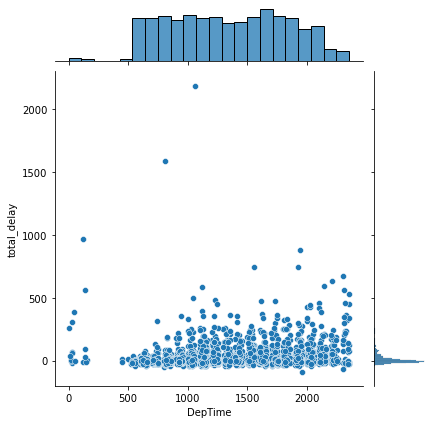

In [12]:
plt.figure()
sns.jointplot(x='DepTime', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

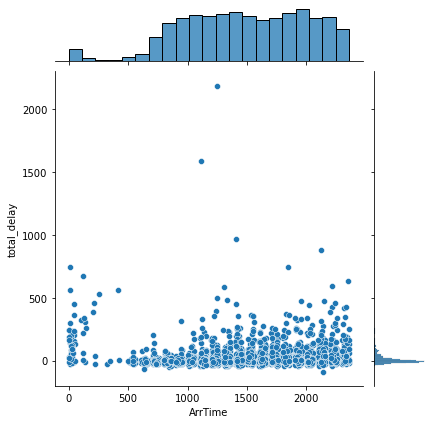

In [13]:
plt.figure()
sns.jointplot(x='ArrTime', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

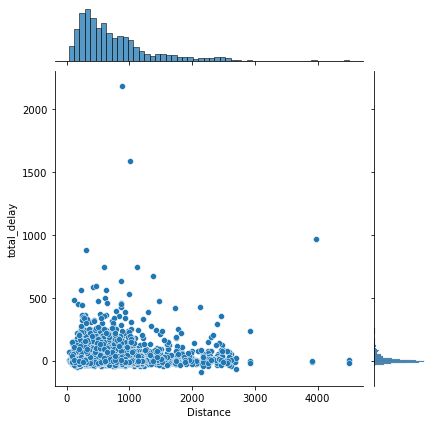

In [15]:
plt.figure()
sns.jointplot(x='Distance', y='total_delay', data=df_sample, kind='scatter')